## 피마인디언 당뇨병 데이터

* 캐글에서 제공하는 피마인디언 당뇨병 데이터 사용

### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

### 분류와 회귀 이용

* 당뇨병 진단 여부 분류
* 인슐린 수치를 회귀를 통해 예측

## 라이브러리 로드

In [ ]:
# 시각화를 위한 seaborn, matplotlib.pyplot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [ ]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


` 데이터가 다 숫자로 되어있기 때문에 따로 전처리 과정 없이 진행! `

## 학습, 예측 데이터셋 나누기

In [ ]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [ ]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [ ]:
test = df[split_count:].copy()
test.shape

(154, 9)

## 학습, 예측에 사용할 컬럼

In [ ]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져오기
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 정답값이자 예측해야 될 값

In [ ]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = train.columns[-1]
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [ ]:
# 학습 세트 만들기 ex.시험의 기출문제
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# 정답 값 ex.기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# 예측에 사용할 데이터셋 만들기 ex.실전 시험 문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [ ]:
# 예측의 정답값 ex.실전 시험 문제의 정답
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 머신러닝 알고리즘 가져오기

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

## 학습(훈련)

* 시험을 볼 때 기출문제와 정답을 보고 공부하는 과정과 유사
- 기출문제 : X_train
- 정답 : y_train

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 예측

- 실전 시험문제(X_test)를 가지고 정답을 직접 예측

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

## 트리 알고리즘 분석하기

* 의사결정나무를 시각화

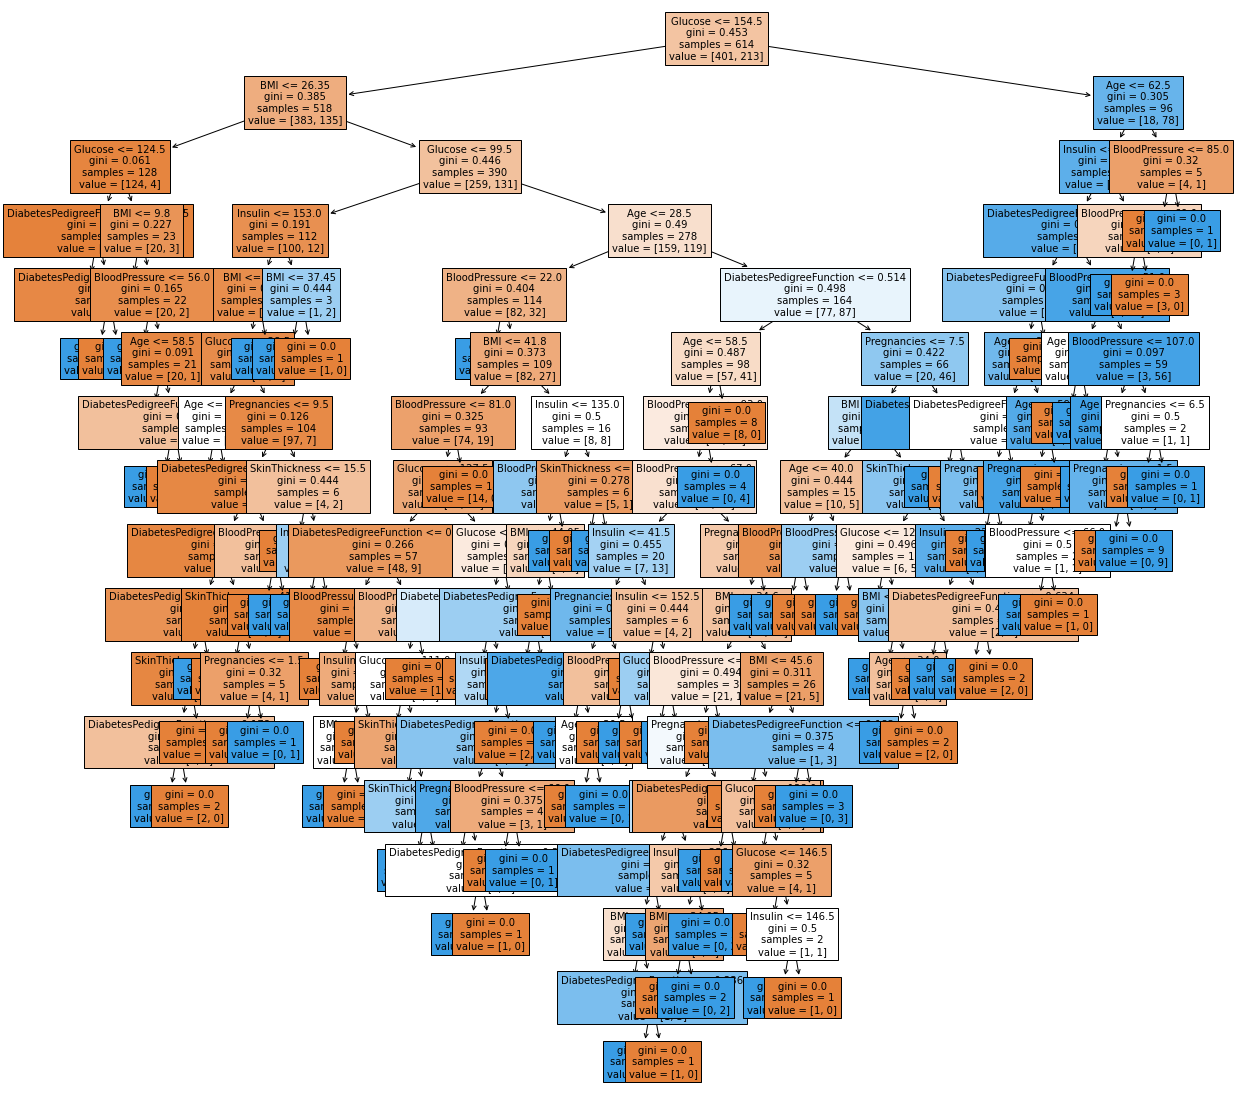

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

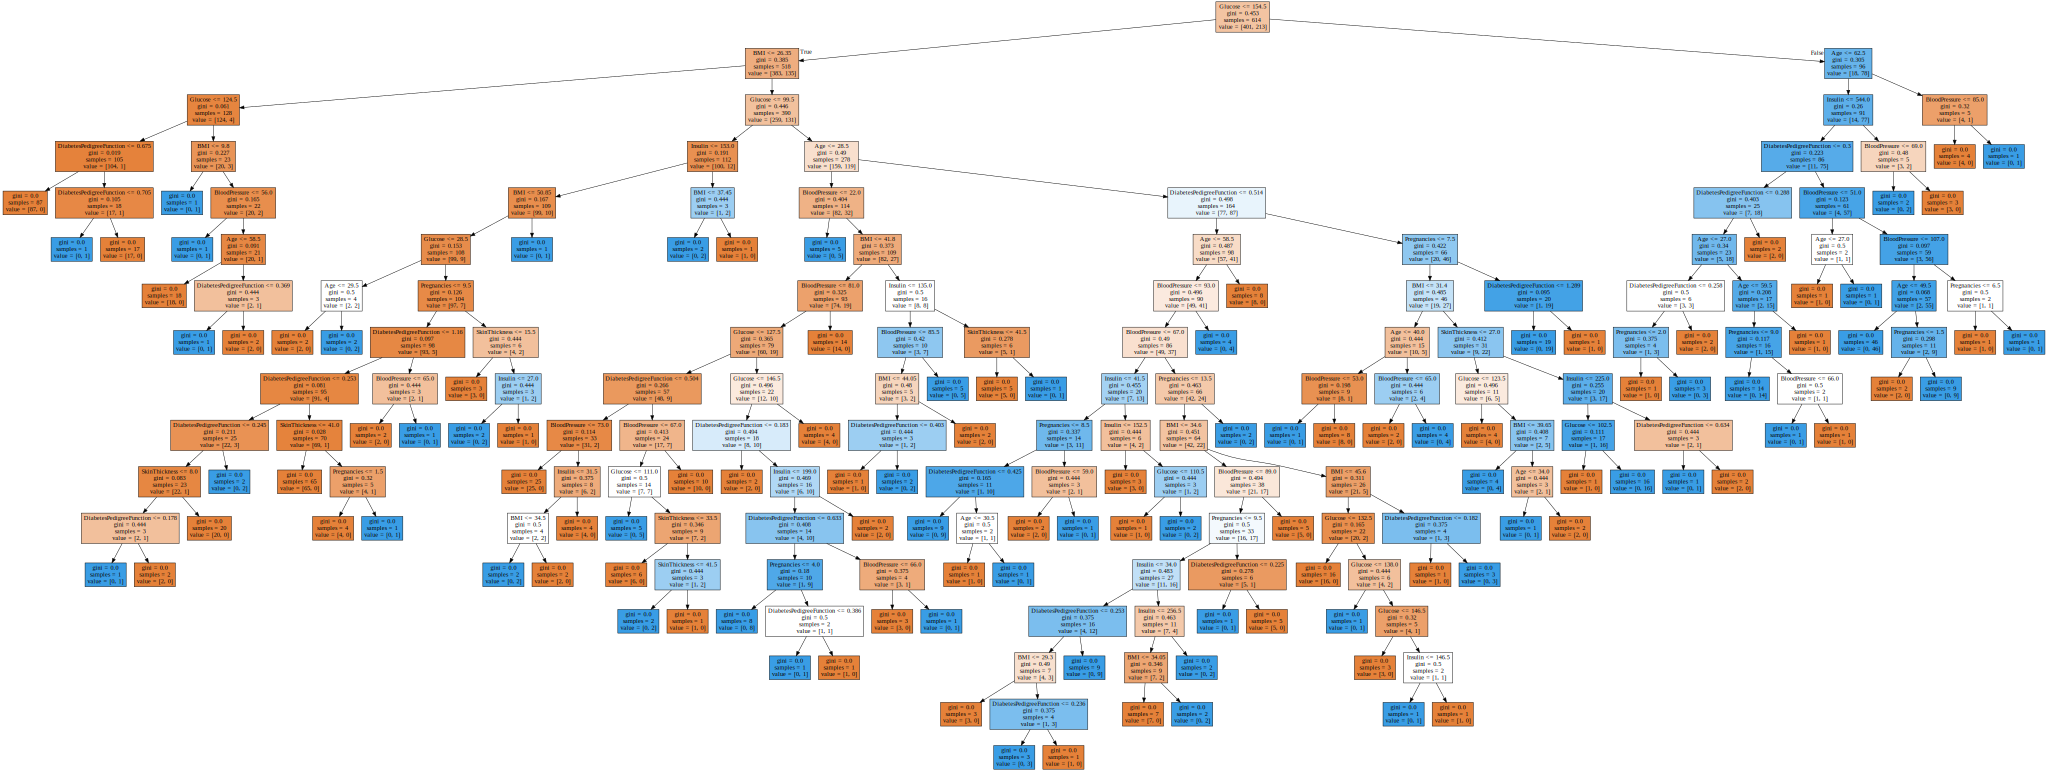

In [ ]:
# graphviz 를 통해 시각화하기
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해주어야함.

import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names = feature_names,
                           filled=True)
graphviz.Source(dot_tree)

In [ ]:
# feature의 중요도를 추출하기

model.feature_importances_

array([0.06698974, 0.30524712, 0.13127595, 0.03336193, 0.07243006,
       0.15203149, 0.1413868 , 0.09727691])

<AxesSubplot:>

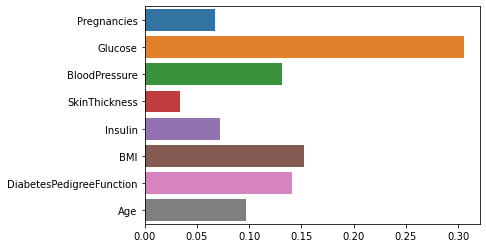

In [ ]:
# feature의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도 측정하기

In [ ]:
# 실제값 - 예측값 해보기
# 만약 0이 나온다면 실제값 = 예측값 인 것

abs(y_test - y_predict)

614    0
615    0
616    1
617    0
618    0
      ..
763    0
764    0
765    0
766    0
767    0
Name: Outcome, Length: 154, dtype: int64

In [ ]:
abs(y_test - y_predict).sum() / len(y_test)

0.2792207792207792

` 0.28 정도를 잘못 예측했다고 볼 수 있다. `

In [ ]:
diff_count = abs(y_test - y_predict).sum()
diff_count

43

In [ ]:
# 예측의 정확도 구하기. 100점 만점 중에 몇 점을 맞았는가?

(len(y_test) - diff_count) / len(y_test) * 100

72.07792207792207

In [ ]:
# 위의 방법말고 알고리즘 사용해보기

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

72.07792207792207

In [ ]:
# model의 score로 점수 계산

model.score(X_test,y_test) * 100

72.07792207792207